In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt



In [2]:

df = pd.read_csv('data/ai_job_market_insights.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [4]:
df.tail(10)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
490,Data Scientist,Energy,Large,Sydney,Medium,Low,Cybersecurity,95170.438294,Yes,Decline
491,Cybersecurity Analyst,Education,Medium,London,Low,High,Data Analysis,90764.668704,No,Decline
492,AI Researcher,Education,Large,San Francisco,Low,Medium,Cybersecurity,119961.891251,No,Growth
493,Cybersecurity Analyst,Energy,Medium,Berlin,Medium,High,UX/UI Design,79936.875359,No,Decline
494,Sales Manager,Transportation,Medium,Tokyo,Medium,High,Sales,97622.960933,Yes,Growth
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable
499,HR Manager,Entertainment,Medium,Berlin,Medium,High,Project Management,68764.378921,Yes,Decline


In [5]:
print( df.head())

               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes         

In [6]:
# Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

Job_Title - 0%
Industry - 0%
Company_Size - 0%
Location - 0%
AI_Adoption_Level - 0%
Automation_Risk - 0%
Required_Skills - 0%
Salary_USD - 0%
Remote_Friendly - 0%
Job_Growth_Projection - 0%


In [7]:
# Store column names
column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD', 'Remote_Friendly', 'Job_Growth_Projection']


In [8]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614


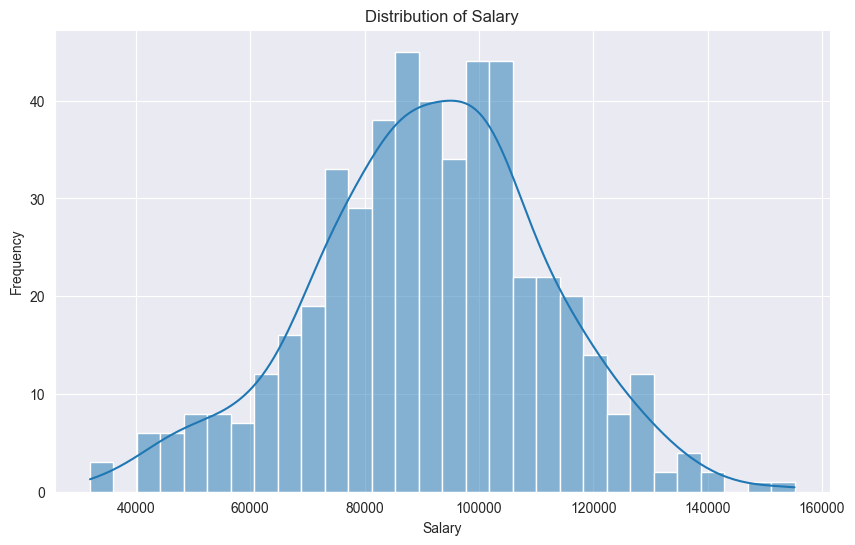

In [9]:
# Visualize the distribution of a numerical column (e.g., 'Salary')
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary_USD'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

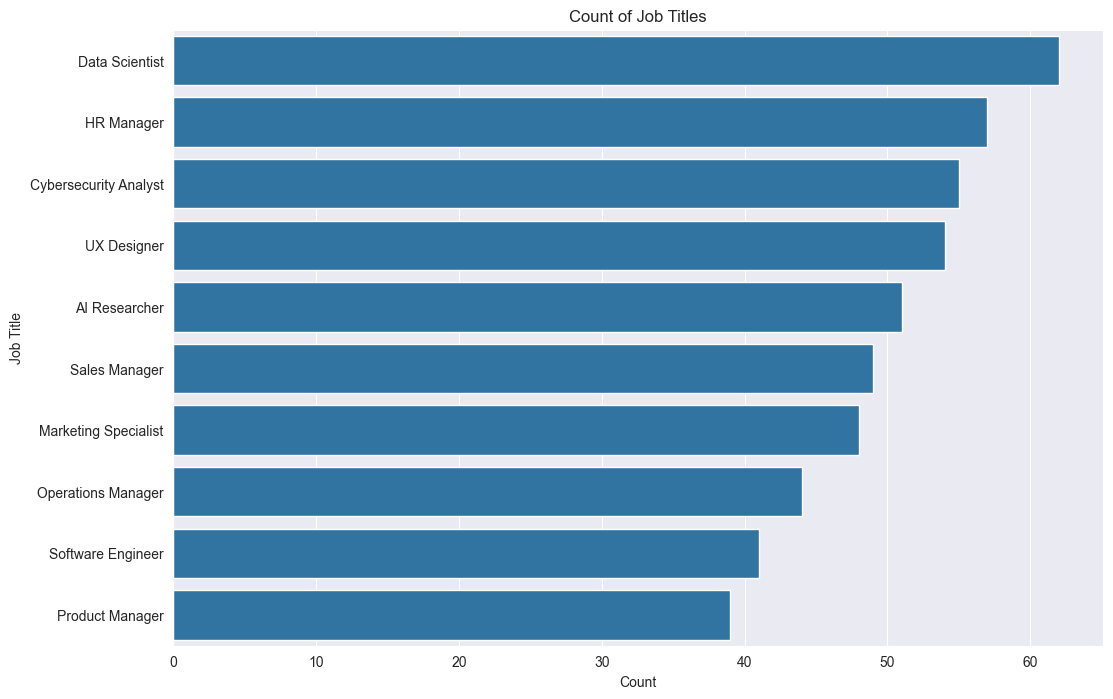

In [10]:
# Visualize the count of categorical column (e.g., 'Job_Title')
plt.figure(figsize=(12, 8))
sns.countplot(y='Job_Title', data=df, order=df['Job_Title'].value_counts().index)
plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

In [11]:
# Convert only numerical columns to numeric (use 'coerce' only for specific columns if needed)
numeric_columns = ['Salary_USD']  # Adjust with your numerical columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [12]:
# Handle outliers using the IQR method with a more lenient threshold
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data shape after handling outliers:", df.shape)

Data shape after handling outliers: (495, 10)


In [13]:
# Encode categorical columns
le = LabelEncoder()
categorical_columns = ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Required_Skills', 'Remote_Friendly','Job_Growth_Projection']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))  # Convert categories to numbers


In [16]:
print(df.info())  # Check the data types and if there are any remaining NaNs
print(df['Automation_Risk'].isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              495 non-null    int64  
 1   Industry               495 non-null    int64  
 2   Company_Size           495 non-null    int64  
 3   Location               495 non-null    int64  
 4   AI_Adoption_Level      495 non-null    int64  
 5   Automation_Risk        495 non-null    object 
 6   Required_Skills        495 non-null    int64  
 7   Salary_USD             495 non-null    float64
 8   Remote_Friendly        495 non-null    int64  
 9   Job_Growth_Projection  495 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 42.5+ KB
None
0


In [17]:

# Split data again after preprocessing
X = df.drop('Automation_Risk', axis=1)  # X indeholder nu alle kolonner bortset fra 'Automation_Risk'
y = df['Automation_Risk']  # y indeholder kun 'Automation_Risk', som er målvariablen

# Håndter NaN-værdier i X (for at undgå NaN-problemer)
X.fillna(X.mean(), inplace=True)  # Udfyld numeriske NaN-værdier med gennemsnittet

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes model
clf = DecisionTreeClassifier(random_state=7)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.42424242424242425
Classification Report:
              precision    recall  f1-score   support

        High       0.44      0.31      0.37        35
         Low       0.27      0.38      0.32        24
      Medium       0.54      0.55      0.54        40

    accuracy                           0.42        99
   macro avg       0.42      0.41      0.41        99
weighted avg       0.44      0.42      0.43        99



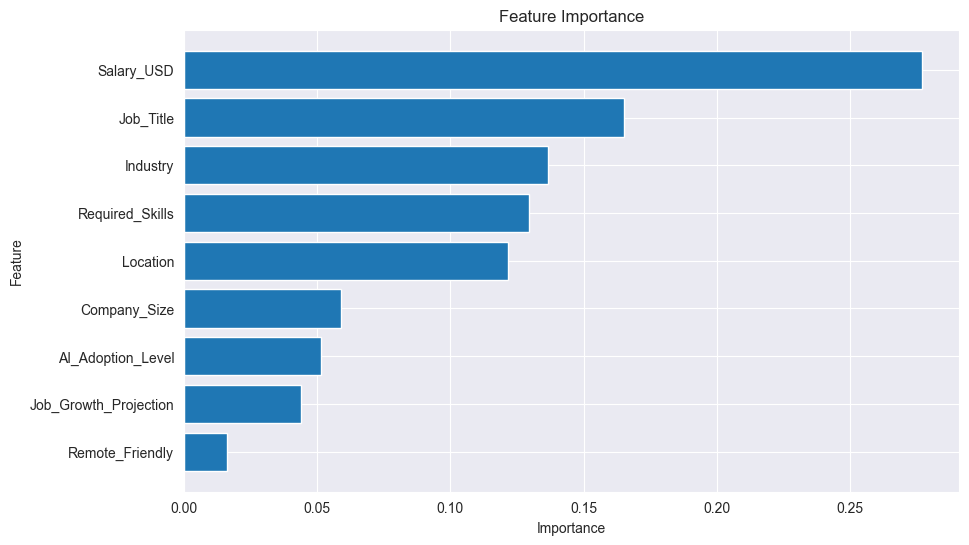

                 Feature  Importance
6             Salary_USD    0.277142
0              Job_Title    0.165112
1               Industry    0.136613
5        Required_Skills    0.129400
3               Location    0.121676
2           Company_Size    0.058814
4      AI_Adoption_Level    0.051257
8  Job_Growth_Projection    0.043936
7        Remote_Friendly    0.016050


In [18]:
# Check feature importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)

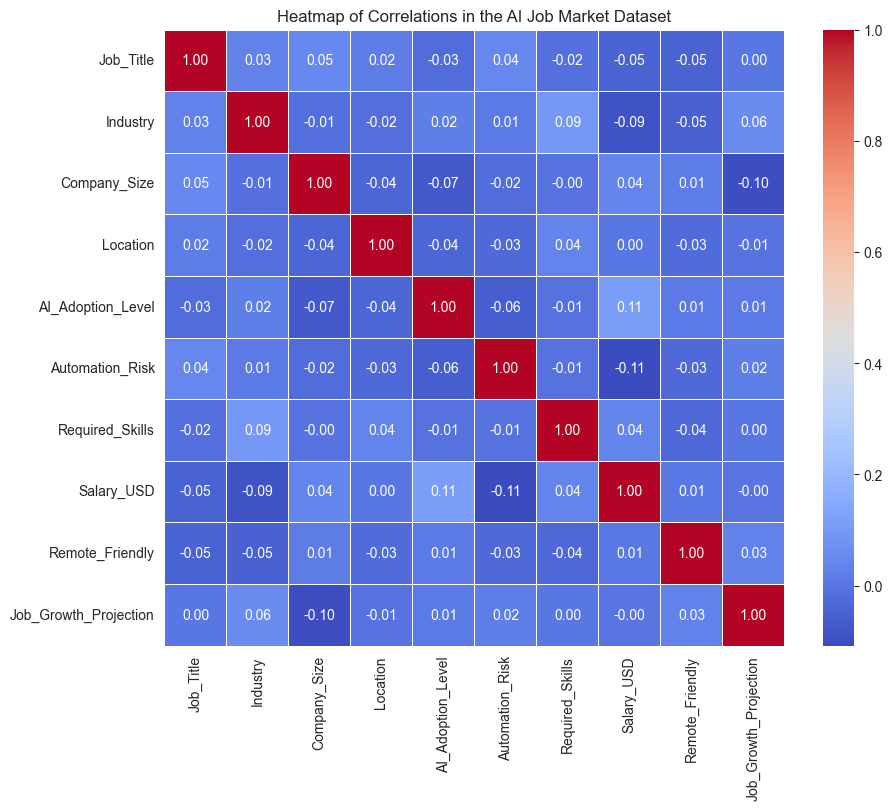

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns using LabelEncoder
categorical_columns = ['Job_Title', 'Industry', 'Company_Size', 'Location', 
                       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 
                       'Remote_Friendly', 'Job_Growth_Projection']

# Create a copy of the dataframe to avoid changing the original
df_encoded = df.copy()

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlations in the AI Job Market Dataset")
plt.show()
